In [1]:
import pandas as pd
import zipfile
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import lzma
import json
import numpy as np
import colorcet as cc
import re
from matplotlib.ticker import ScalarFormatter


sns.set_theme(font_scale=0.81666666666666666)
plt.rc('text', usetex=True)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
plt.rc('text.latex', preamble=
    r'''
    \RequirePackage[T1]{fontenc}
    \RequirePackage{amsmath}
    \RequirePackage{siunitx}
    \RequirePackage[super]{nth}
    ''')

# Load compressed data

In [2]:
with lzma.open("./02_sammy_summary_data.json.xz", "rt") as f:
    sammy_data = json.load(f)
with lzma.open("./02_nosimp_summary_data.json.xz", "rt") as f:
    nosimp_data = json.load(f)
with lzma.open("./02_baseline_summary_data.json.xz", "rt") as f:
    baseline_data = json.load(f)
with lzma.open("./02_samplns_summary_data.json.xz", "rt") as f:
    samplns_data = json.load(f)

In [3]:
sammy_dataframe = pd.DataFrame.from_dict(sammy_data, orient='index')
sammy_dataframe.head()

,one_optimal,all_optimal,optimalities,lb_optimalities,lb_histories,ub_histories,mes_optimalities,ubs,min_ub,max_ub,...,simplification_simplification_rounds,simplification_simplification_time,simplification_variables_after,simplification_variables_before,simplification_variables_eliminated_by_equality,simplification_variables_eliminated_by_resolution,simplification_variables_fixed,num_clauses,num_variables,num_concrete
calculate,True,True,"[True, True, True, True, True]","[True, True, True, True, True]","[[{'time': 0.001837014, 'lb': 3, 'source': 'in...","[[{'time': 0.001139213, 'ub': 6, 'source': 'in...","[False, False, False, False, False]","[5, 5, 5, 5, 5]",5,5,...,2,0.000030,5,8,0,2,1,13,8,5
car,True,True,"[True, True, True, True, True]","[True, True, True, True, True]","[[{'time': 0.002262744, 'lb': 3, 'source': 'in...","[[{'time': 0.001708173, 'ub': 5, 'source': 'in...","[False, False, False, False, False]","[5, 5, 5, 5, 5]",5,5,...,2,0.000045,4,14,3,1,6,26,14,9
FameDB,True,True,"[True, True, True, True, True]","[True, True, True, True, True]","[[{'time': 0.002316873, 'lb': 2, 'source': 'in...","[[{'time': 0.00184072, 'ub': 10, 'source': 'in...","[True, True, True, True, True]","[8, 8, 8, 8, 8]",8,8,...,1,0.000039,11,15,3,0,1,26,15,13
uclibc_2020-12-24_11-54-53,True,True,"[True, True, True, True, True]","[True, True, True, True, True]","[[{'time': 0.037270821, 'lb': 154, 'source': '...","[[{'time': 0.019062272, 'ub': 367, 'source': '...","[True, True, True, True, True]","[365, 365, 365, 365, 365]",365,365,...,2,0.003681,244,272,15,0,13,1670,272,272
aaed2000,True,True,"[True, True, True, True, True]","[True, True, True, True, True]","[[{'time': 0.044572889, 'lb': 25, 'source': 'i...","[[{'time': 0.040025406, 'ub': 88, 'source': 'i...","[True, True, True, True, True]","[52, 52, 52, 52, 52]",52,52,...,4,0.015554,643,1183,218,260,64,2190,1183,819


In [4]:
sammy_dataframe.keys()

Index(['one_optimal', 'all_optimal', 'optimalities', 'lb_optimalities',
       'lb_histories', 'ub_histories', 'mes_optimalities', 'ubs', 'min_ub',
       'max_ub', 'avg_ub', 'med_ub', 'lbs', 'min_lb', 'max_lb', 'avg_lb',
       'med_lb', 'initial_lbs', 'min_initial_lb', 'max_initial_lb',
       'avg_initial_lb', 'med_initial_lb', 'initial_ubs', 'min_initial_ub',
       'max_initial_ub', 'avg_initial_ub', 'med_initial_ub', 'solve_times',
       'min_solve_time', 'max_solve_time', 'avg_solve_time', 'med_solve_time',
       'initial_times', 'min_initial_time', 'max_initial_time',
       'avg_initial_time', 'med_initial_time', 'first_sol_times',
       'min_first_sol_time', 'max_first_sol_time', 'avg_first_sol_time',
       'med_first_sol_time', 'first_sol_sizes', 'min_first_sol_size',
       'max_first_sol_size', 'avg_first_sol_size', 'med_first_sol_size',
       'best_mes_sizes', 'min_best_mes_size', 'max_best_mes_size',
       'avg_best_mes_size', 'med_best_mes_size', 'interactions_non

In [5]:
nosimp_dataframe = pd.DataFrame.from_dict(nosimp_data, orient='index')
nosimp_dataframe.head()

,initial_lbs,initial_ubs,initial_times,first_sol_times,feature_count_nonreduced,initial_lb_mean,initial_lb_med,initial_lb_max,initial_lb_min,initial_ub_mean,...,initial_ub_max,initial_ub_min,initial_time_mean,initial_time_med,initial_time_max,initial_time_min,first_sol_time_mean,first_sol_time_med,first_sol_time_max,first_sol_time_min
fiasco_2020-12-01_14-09-14,"[178, 188, 186, 183, 190]","[211, 215, 212, 212, 214]","[5.0645633, 5.054784119, 5.00945457, 5.0540397...","[0.034607112, 0.035122432, 0.034385491, 0.0366...",102755,185.0,186.0,190,178,212.8,...,215,211,5.048724,5.054784,5.064563,5.009455,0.034990,0.034607,0.036662,0.034171
Violet,"[10, 10, 10, 10, 10]","[22, 22, 22, 22, 22]","[5.003393852, 5.004259515, 5.004422196, 5.0025...","[0.002064008, 0.002683827, 0.004219241, 0.0024...",14517,10.0,10.0,10,10,22.0,...,22,22,5.003676,5.003715,5.004422,5.002590,0.002707,0.002444,0.004219,0.002064
aaed2000,"[44, 45, 46, 45, 43]","[82, 82, 82, 82, 83]","[5.050358793, 5.071151129, 5.078167455, 5.0749...","[0.036645471, 0.036618852, 0.037041641, 0.0371...",1250781,44.6,45.0,46,43,82.2,...,83,82,5.060110,5.071151,5.078167,5.025942,0.036717,0.036645,0.037124,0.036157
BattleofTanks,"[255, 255, 255, 255, 255]","[387, 387, 387, 387, 381]","[5.01155042, 5.006220086, 5.004404525, 5.00240...","[0.008619918, 0.009718361, 0.009171514, 0.0082...",33452,255.0,255.0,255,255,385.8,...,387,381,5.008516,5.006220,5.017995,5.002408,0.009029,0.009172,0.009718,0.008274
lcm,"[5, 5, 5, 5, 5]","[6, 6, 6, 6, 6]","[5.001215341, 5.000732702, 5.000212735, 5.0017...","[0.00118004, 0.00068733, 0.00022337, 0.0017209...",37,5.0,5.0,5,5,6.0,...,6,6,5.001041,5.001215,5.001757,5.000213,0.001019,0.001180,0.001721,0.000223


In [6]:
nosimp_dataframe.keys()

Index(['initial_lbs', 'initial_ubs', 'initial_times', 'first_sol_times',
       'feature_count_nonreduced', 'initial_lb_mean', 'initial_lb_med',
       'initial_lb_max', 'initial_lb_min', 'initial_ub_mean', 'initial_ub_med',
       'initial_ub_max', 'initial_ub_min', 'initial_time_mean',
       'initial_time_med', 'initial_time_max', 'initial_time_min',
       'first_sol_time_mean', 'first_sol_time_med', 'first_sol_time_max',
       'first_sol_time_min'],
      dtype='object')

# Comparison with and without simplification
## Time to first solution (including simplification time, on instances where that is non-negligible)

In [8]:
simp_comparison_table = []
instances_with_significant_time = set(sammy_dataframe.query('max_first_sol_time > 0.5').index)
instances_with_significant_time.update(
    set(nosimp_dataframe.query('first_sol_time_max > 0.5').index))
instances_with_significant_time

{'Automotive01',
 'Automotive02_V1',
 'Automotive02_V2',
 'Automotive02_V3',
 'Automotive02_V4',
 'EMBToolkit',
 'FreeBSD-8_0_0',
 'financial-services-2018-04-23',
 'financial_services',
 'linux_2_6_28_6',
 'linux_2_6_33_3'}

In [9]:
for instance in instances_with_significant_time:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    for fssimp, fsnosimp in zip(sammy_entry['first_sol_times'], nosimp_entry['first_sol_times']):
        simp_comparison_table.append({
            'instance': instance,
            'category': '\\nth{1} sol. time',
            'fraction': fssimp / fsnosimp
        })

## Gap after initial phase
This is all over the place and would make the plot unreadable.

In [10]:
for instance in sammy_data:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    for ubsimp, lbsimp, ubnosimp, lbnosimp in zip(
        sammy_entry['initial_ubs'],
        sammy_entry['initial_lbs'],
        nosimp_entry['initial_ubs'],
        nosimp_entry['initial_lbs']
    ):
        gap_simp = (ubsimp - lbsimp) / lbsimp
        gap_nosimp = (ubnosimp - lbnosimp) / lbnosimp
        simp_comparison_table.append({
            'instance': instance,
            'category': 'initial_gap',
            'fraction': gap_simp / gap_nosimp
        })

## Number of variables, concretes, clauses, formula size

In [11]:
for instance in sammy_data:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    simp_comparison_table.append({
        'instance': instance,
        'category': 'variables',
        'fraction': sammy_entry['simplification_variables_after'] / \
                    sammy_entry['simplification_variables_before']
    })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'clauses',
        'fraction': sammy_entry['simplification_clauses_after'] / \
                    sammy_entry['simplification_clauses_before']
    })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'formula size',
        'fraction': sammy_entry['simplification_formula_length_after'] / \
                    sammy_entry['simplification_formula_length_before']
    })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'concrete features',
        'fraction': sammy_entry['simplification_concrete_after'] / \
                    sammy_entry['simplification_concrete_before']
    })

## Number of interactions

In [12]:
for instance in sammy_data:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    nosimp_interactions = nosimp_entry['feature_count_nonreduced']
    for num_reduced in sammy_entry['interactions_reduceds']:
        simp_comparison_table.append({
            'instance': instance,
            'category': 'feas.~int.~(UR/S)',
            'fraction': num_reduced / nosimp_interactions
        })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'feas.~int.~(S)',
        'fraction': sammy_entry['interactions_nonreduced'] / nosimp_interactions
    })

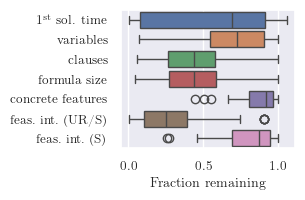

In [13]:
simp_comparison_table_df = pd.DataFrame(simp_comparison_table)
sns.boxplot(data=simp_comparison_table_df.query('category != "initial_gap"'),
            x='fraction', y='category', hue='category')
plt.gca().set_ylabel('')
plt.gca().set_xlabel('Fraction remaining')
plt.gcf().set_size_inches(2.25, 1.8)
plt.savefig('impact_of_simplification.pdf',
            bbox_inches='tight',
            pad_inches=0.05)

# Comparison to baselines
## Number of instances solved

In [14]:
baseline_num_solved = {}
for algorithm, algorithm_data in baseline_data.items():
    num_any_solved = 0
    num_all_solved = 0
    not_solved = []
    not_all_solved = []
    for instance, result in algorithm_data.items():
        is_all_solved = (result["runs"] == result["solved"])
        is_any_solved = (result["solved"] > 0)
        if not is_any_solved:
            not_solved.append(instance)
        elif not is_all_solved:
            not_all_solved.append(instance)
        num_any_solved += is_any_solved
        num_all_solved += is_all_solved
    baseline_num_solved[algorithm] = {"num_solved_any_runs": num_any_solved,
                                      "num_solved_all_runs": num_all_solved,
                                      "not_solved": not_solved,
                                      "not_all_solved": not_all_solved}

not_solved = []
not_all_solved = []
num_any_solved = 0
num_all_solved = 0
for instance, result in samplns_data.items():
    is_all_solved = (result["runs"] == result["solved"])
    is_any_solved = (result["solved"] > 0)
    if not is_any_solved:
        not_solved.append(instance)
    elif not is_all_solved:
        not_all_solved.append(instance)
    num_any_solved += is_any_solved
    num_all_solved += is_all_solved
baseline_num_solved["SampLNS"] = {
    "num_solved_any_runs": num_any_solved,
    "num_solved_all_runs": num_all_solved,
    "not_solved": not_solved,
    "not_all_solved": not_all_solved,
}
baseline_num_solved = pd.DataFrame.from_dict(baseline_num_solved,
                                             orient="index")
baseline_num_solved.sort_values("num_solved_any_runs", ascending=False)

,num_solved_any_runs,num_solved_all_runs,not_solved,not_all_solved
YASA (1h),51,51,"[Automotive02_V1, Automotive02_V3, Automotive0...",[]
YASA,51,51,"[Automotive02_V1, Automotive02_V2, Automotive0...",[]
YASA3,51,51,"[Automotive02_V1, Automotive02_V2, Automotive0...",[]
YASA5,51,51,"[Automotive02_V3, Automotive02_V4, Automotive0...",[]
YASA10,51,51,"[Automotive02_V1, Automotive02_V2, Automotive0...",[]
IL,51,51,"[Automotive02_V4, Automotive02_V3, Automotive0...",[]
SampLNS,51,51,[],[]
IC,49,49,"[Automotive02_V2, Automotive02_V1, Automotive0...",[]
CH,46,46,"[Automotive02_V4, Automotive02_V2, Automotive0...",[]
IPOG_FT,3,3,"[linux_2_6_33_3, soletta_2017-03-09_21-02-40, ...",[]


## Heuristic runtime comparison
### Cactus plot information for baseline heuristics

In [15]:
def median_solve_time(result):
    solve_times = list(result['solve_times'])
    solve_times += [math.inf] * (result['runs'] - len(solve_times))
    solve_times.sort()
    return solve_times[len(solve_times) // 2]

heuristic_baselines = {'YASA10', 'YASA', 'IL', 'YASA5', 'YASA3', 
                       'IC', 'CH', 'IPOF_FT', 'IPOG_FT', 'IPOF_CSP', 'IPOG_CSP'}
heuristic_solved_after_time = []
for algorithm, algorithm_data in baseline_data.items():
    if algorithm not in heuristic_baselines:
        continue
    solved_instances = {}
    for instance, result in algorithm_data.items():
        med_solve_time = median_solve_time(result)
        if np.isfinite(med_solve_time):
            solved_instances[instance] = med_solve_time
    instance_solve_times = list(solved_instances.values())
    instance_solve_times.sort()
    heuristic_solved_after_time.append({'heuristic': algorithm,
                                        'time': 0.0,
                                        'solved': 0})
    for index, solve_time in enumerate(instance_solve_times):
        heuristic_solved_after_time.append({
            'heuristic': algorithm,
            'time': np.nextafter(solve_time, -math.inf),
            'solved': index})
        heuristic_solved_after_time.append({
            'heuristic': algorithm,
            'time': solve_time,
            'solved': index + 1
        })
    heuristic_solved_after_time.append({
        'heuristic': algorithm,
        'time': 5000.0,
        'solved': len(instance_solve_times)
    })


### Cactus plot information for sammy initial

In [16]:
sammy_first_times = []
sammy_initial_times = []
for instance, instance_data in sammy_data.items():
    sammy_initial_times.append(instance_data['med_initial_time'])
    sammy_first_times.append(instance_data['med_first_sol_time'])
algonames = ['sammy (first)', 'sammy (initial)']
algolists = [sammy_first_times, sammy_initial_times]
for algoname, algolist in zip(algonames, algolists):
    algolist.sort()
    heuristic_solved_after_time.append({'heuristic': algoname,
                                        'time': 0.0,
                                        'solved': 0})
for algoname, algolist in zip(algonames, algolists):
    for index, t in enumerate(algolist):
        heuristic_solved_after_time.append({'heuristic': algoname,
                                            'time': np.nextafter(t, -math.inf),
                                            'solved': index})
        heuristic_solved_after_time.append({'heuristic': algoname, 
                                            'time': t,
                                            'solved': index+1})
for algoname, algolist in zip(algonames, algolists):
    heuristic_solved_after_time.append({'heuristic': algoname,
                                        'time': 5000.0,
                                        'solved': len(algolist)})

In [17]:
heuristic_solved_after_time_df = pd.DataFrame(heuristic_solved_after_time)

## Actual plot

/var/folders/wd/nrcjx5551993mcd3k2sq9c580000gn/T/ipykernel_17000/2207386874.py:41: UserWarning: The palette list has more values (16) than needed (14), which may not be intended.
  sns.lineplot(data=heuristic_solved_after_time_df, x="time", y="solved",


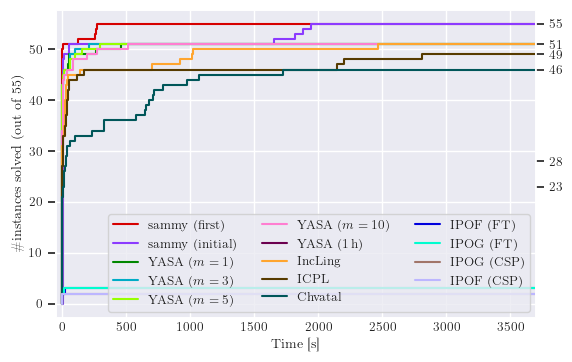

In [18]:
ipofg_re = re.compile(r'^(IPO[FG])_([A-Z]+)$')
def map_algo_names(name):
    if 'YASA' in name and '1h' in name:
        return 'YASA (\\qty{1}{h})'
    if name.startswith('YASA'):
        if name == 'YASA':
            return 'YASA $(m = 1)$'
        return f'YASA $(m = {name[4:]})$'
    m = ipofg_re.match(name)
    if m:
        return f'{m.group(1)} ({m.group(2)})'
    if name == 'IL':
        return 'IncLing'
    if name == 'IC':
        return 'ICPL'
    if name == 'CH':
        return 'Chvatal'
    return name

heuristic_solved_after_time_df['Heuristic'] = \
    heuristic_solved_after_time_df['heuristic'].apply(map_algo_names)
plot_order = [
    'sammy (first)',
    'sammy (initial)',
    'YASA $(m = 1)$',
    'YASA $(m = 3)$',
    'YASA $(m = 5)$',
    'YASA $(m = 10)$',
    'YASA (\\qty{1}{h})',
    'IncLing',
    'ICPL',
    'Chvatal',
    'IPOF (FT)',
    'IPOG (FT)',
    'IPOG (CSP)',
    'IPOF (CSP)',
]

ax = plt.gca()
palette = sns.color_palette(cc.glasbey, n_colors=16)
sns.lineplot(data=heuristic_solved_after_time_df, x="time", y="solved",
             hue="Heuristic", ax=ax, palette=palette, hue_order=plot_order)
ax.tick_params(axis='x', pad=-3)
ax.set_xlim(-50, 3700)
ax.set_xlabel("Time [s]")
ax.set_ylabel("\\#instances solved (out of 55)")
ax.legend().set_title("")
sns.move_legend(ax, "lower right", ncol=3)
#ax.set_title('higher is better')
ax2 = ax.twinx()
ax2.grid(False)
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.set_yticks([55, 51, 49, 46, 28, 23])
ax2.set_ylim(*ax.get_ylim())
plt.gcf().set_size_inches(6.2, 4.0)
plt.savefig('heuristic_runtime_cactus.pdf', bbox_inches='tight', 
            pad_inches=0.05)

## Time to proven optimality/within 10% of optimality

In [19]:
def median_time_to_relative_gap(runs, lb_histories, ub_histories, relative_gap):
    assert len(lb_histories) == len(ub_histories)
    times_to_relative_gap = [math.inf] * (runs - len(lb_histories))
    for lb_history, ub_history in zip(lb_histories, ub_histories):
        steps = lb_history + ub_history
        steps.sort(key=lambda x: x['time'])
        best_lb = None
        best_ub = None
        found = False
        for step in steps:
            if 'lb' in step:
                best_lb = step['lb']
            if 'ub' in step:
                best_ub = step['ub']
            if best_lb is not None and best_ub is not None:
                if best_lb * (1.0 + relative_gap) >= best_ub:
                    times_to_relative_gap.append(step['time'])
                    found = True
                    break
        if not found:
            times_to_relative_gap.append(math.inf)
    times_to_relative_gap.sort()
    return times_to_relative_gap[len(times_to_relative_gap) // 2]

In [20]:
time_to_relative_gap_info = []

for instance, instance_data in sammy_data.items():
    time = median_time_to_relative_gap(len(instance_data['lb_histories']), 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.1)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'sammy (\qty{10}{\percent} gap)',
        'time': time,
    })
    time = median_time_to_relative_gap(len(instance_data['lb_histories']), 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.0)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'sammy (optimality)',
        'time': time,
    })

for instance, instance_data in samplns_data.items():
    time = median_time_to_relative_gap(instance_data['runs'], 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.1)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'SampLNS (\qty{10}{\percent} gap)',
        'time': time,
    })
    time = median_time_to_relative_gap(instance_data['runs'], 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.0)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'SampLNS (optimality)',
        'time': time,
    })

time_to_relative_gap_info = pd.DataFrame(time_to_relative_gap_info)
time_to_relative_gap_info

,instance,algorithm,time
0,calculate,sammy (\qty{10}{\percent} gap),5.028365
1,calculate,sammy (optimality),5.028365
2,car,sammy (\qty{10}{\percent} gap),5.027931
3,car,sammy (optimality),5.027931
4,FameDB,sammy (\qty{10}{\percent} gap),5.070235
...,...,...,...
207,financial-services-2018-04-23,SampLNS (optimality),inf
208,linux_2_6_33_3,SampLNS (\qty{10}{\percent} gap),inf
209,linux_2_6_33_3,SampLNS (optimality),inf
210,Automotive01,SampLNS (\qty{10}{\percent} gap),inf


In [21]:
def to_num_solved_at_time(dataframe, actual_time_limit, plot_time_limit):
    num_solved = [{'Algorithm': algo, 'time': 0.0, 'solved': 0}
                  for algo in dataframe['algorithm'].unique()]
    algo_num_solved = {algo: 0 for algo in dataframe['algorithm'].unique()}
    algo_finished = {algo: False for algo in dataframe['algorithm'].unique()}
    for row in dataframe.sort_values("time").itertuples():
        algo = row.algorithm
        if row.time > actual_time_limit:
            if not algo_finished[algo]:
                num_solved.append({
                    'Algorithm': algo,
                    'time': plot_time_limit,
                    'solved': algo_num_solved[algo]
                })
                algo_finished[algo] = True
            continue
        num_solved.append({
            'Algorithm': algo,
            'time': np.nextafter(row.time, -math.inf),
            'solved': algo_num_solved[algo]
        })
        algo_num_solved[algo] += 1
        num_solved.append({
            'Algorithm': algo,
            'time': row.time,
            'solved': algo_num_solved[algo]
        })
    for algo, finished in algo_finished.items():
        if not finished:
            num_solved.append({
                'Algorithm': algo,
                'time': plot_time_limit,
                'solved': algo_num_solved[algo]
            })
    return pd.DataFrame(num_solved)

In [22]:
num_solved_after_time = to_num_solved_at_time(time_to_relative_gap_info,
                                              actual_time_limit=3620.0,
                                              plot_time_limit=3800.0)

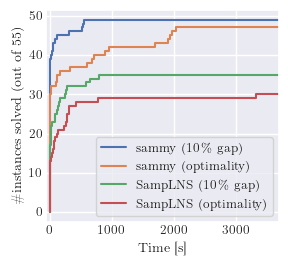

In [23]:
ax = plt.gca()
sns.lineplot(data=num_solved_after_time, x="time", y="solved",
             hue="Algorithm", ax=ax)
ax.set_xlim(-50, 3700)
ax.set_xlabel("Time [s]")
ax.set_ylabel(r"\#instances solved (out of 55)")
plt.gcf().set_size_inches(3.0, 2.75)
ax.tick_params(axis='x', pad=-3)
ax.tick_params(axis='y', pad=-3)
plt.legend().set_title("")
plt.savefig('lns_runtime_comparison.pdf', bbox_inches='tight')

# Lower bounds

In [24]:
best_lower_bounds = {}
for instance, instance_data in sammy_data.items():
    best_lower_bounds[instance] = instance_data['max_lb']
for instance, best_lb in best_lower_bounds.items():
    if instance not in samplns_data:
        if "Automotive02" not in instance:
            print("WARNING - MISSING INSTANCE", instance, "IN SAMPLNS DATA")
        continue
    samplns_lb = max(samplns_data[instance]['lower_bounds'])
    if samplns_lb > best_lb:
        raise ValueError(f"SampLNS found better bound than sammy for instance {instance}!")

# Solution quality

In [25]:
solution_quality_to_best_lb = []
def push_sol_quality(algorithm, instance, value):
    solution_quality_to_best_lb.append({
        'Algorithm': algorithm,
        'instance': instance,
        'relative_gap': (value - best_lower_bounds[instance]) / \
                         best_lower_bounds[instance],
    })


for instance, instance_data in sammy_data.items():
    for ub in instance_data['initial_ubs']:
        push_sol_quality('sammy (initial)', instance, ub)
    for ub in instance_data['first_sol_sizes']:
        push_sol_quality('sammy (first)', instance, ub)
    for ub in instance_data['ubs']:
        push_sol_quality('sammy', instance, ub)

for instance, instance_data in samplns_data.items():
    for ub in instance_data['upper_bounds']:
        push_sol_quality('SampLNS', instance, ub)

for algorithm, algorithm_data in baseline_data.items():
    for instance, instance_data in algorithm_data.items():
        for ub in instance_data['n_samples']:
            push_sol_quality(map_algo_names(algorithm), instance, ub)
solution_quality_to_best_lb = pd.DataFrame(solution_quality_to_best_lb)
solution_quality_to_best_lb

,Algorithm,instance,relative_gap
0,sammy (initial),calculate,0.000000
1,sammy (initial),calculate,0.000000
2,sammy (initial),calculate,0.000000
3,sammy (initial),calculate,0.000000
4,sammy (initial),calculate,0.000000
...,...,...,...
3385,IPOG (FT),lcm,0.500000
3386,IPOG (FT),lcm,0.500000
3387,IPOG (FT),lcm,0.666667
3388,IPOG (FT),lcm,0.500000


In [26]:
num_solved_table = baseline_num_solved.reset_index(inplace=False, drop=False)
num_solved_table.rename(columns={'index': 'Algorithm'}, inplace=True)
num_solved_table['Algorithm'] = num_solved_table['Algorithm'].apply(map_algo_names)

def get_num_solved_any_runs(algorithm):
    if 'sammy' in algorithm:
        return 55
    return num_solved_table[num_solved_table['Algorithm'] == algorithm]['num_solved_any_runs'].iloc[0]

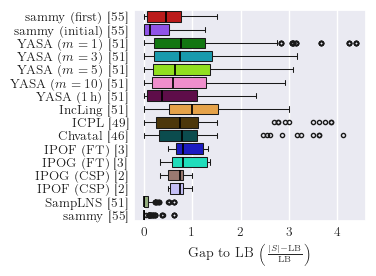

In [27]:
fig, ax = plt.gcf(), plt.gca()
extended_plot_order = plot_order + ['SampLNS', 'sammy']

def name_add_solved(algorithm):
    num_solved = get_num_solved_any_runs(algorithm)
    return f'{algorithm} [{num_solved}]'

extended_plot_order_noc = extended_plot_order
extended_plot_order = [name_add_solved(algo) for algo in extended_plot_order]
solution_quality_to_best_lb['AlgorithmWC'] = \
    solution_quality_to_best_lb['Algorithm'].apply(name_add_solved)

sns.boxplot(data=solution_quality_to_best_lb,
            x='relative_gap', y='AlgorithmWC', hue='AlgorithmWC', ax=ax,
            order=extended_plot_order, hue_order=extended_plot_order, 
            palette=palette, fliersize=3, linewidth=0.75, 
            medianprops={'color': 'black', 'linewidth': 1.25})
ax.set_xlabel(r"Gap to LB {\small $\left(\frac{|S| - \operatorname{LB}}{\operatorname{LB}}\right)$}")
ax.set_ylabel("")
ax.tick_params(axis='x', pad=-2)
ax.tick_params(axis='y', pad=-2)
plt.gcf().set_size_inches(3.0, 2.75)
plt.savefig('solution_quality.pdf', bbox_inches='tight')

In [28]:
solution_quality_performance_plot_data = []
total_num_runs = len(solution_quality_to_best_lb.query('Algorithm == "sammy (initial)"'))
distinct_algorithms = set(solution_quality_to_best_lb['Algorithm'].unique())
previous_num_solved = {algorithm: (-0.0000001, 0) for algorithm in distinct_algorithms}
max_gap = -0.0000001
for algorithm, (rgap, num_solved) in previous_num_solved.items():
    solution_quality_performance_plot_data.append({
        'Algorithm': algorithm,
        'relative_gap': rgap,
        'frac_solved': num_solved,
    })

for row in solution_quality_to_best_lb.sort_values('relative_gap').itertuples():
    algorithm = row.Algorithm
    relative_gap = row.relative_gap
    prev_gap, prev_num_solved = previous_num_solved[algorithm]
    max_gap = max(relative_gap, max_gap)
    if prev_gap < relative_gap:
        solution_quality_performance_plot_data.append({
            'Algorithm': algorithm,
            'relative_gap': prev_gap,
            'frac_solved': prev_num_solved / total_num_runs,
        })
        solution_quality_performance_plot_data.append({
            'Algorithm': algorithm,
            'relative_gap': np.nextafter(relative_gap, -math.inf),
            'frac_solved': prev_num_solved / total_num_runs,
        })
    previous_num_solved[algorithm] = (relative_gap, prev_num_solved + 1)

max_gap *= 1.05
for algorithm, (rgap, num_solved) in previous_num_solved.items():
    solution_quality_performance_plot_data.append({
        'Algorithm': algorithm,
        'relative_gap': rgap,
        'frac_solved': num_solved / total_num_runs,
    })
    solution_quality_performance_plot_data.append({
        'Algorithm': algorithm,
        'relative_gap': max_gap,
        'frac_solved': num_solved / total_num_runs,
    })
solution_quality_performance_plot_data_df = pd.DataFrame(solution_quality_performance_plot_data)

In [29]:
heuristic_solve_time_data = []
def handle_algo_and_table(algorithm, algorithm_data,
                          times_key='solve_times', nsamples_key='n_samples'):
    for instance, instance_data in algorithm_data.items():
        for run_time, n_samples in zip(instance_data[times_key], 
                                       instance_data[nsamples_key]):
            if n_samples and np.isfinite(n_samples):
                heuristic_solve_time_data.append({
                    'Heuristic': algorithm,
                    'solve_time': run_time,
                    'instance': instance,
                })

for algorithm, algorithm_data in baseline_data.items():
    print(algorithm)
    if algorithm in heuristic_baselines:
        handle_algo_and_table(map_algo_names(algorithm), algorithm_data)
handle_algo_and_table('sammy (initial)', sammy_data, 
                      'initial_times', 'initial_ubs')
handle_algo_and_table('sammy (first)', sammy_data,
                      'first_sol_times', 'first_sol_sizes')
heuristic_solve_time_data.sort(key=lambda x: x['solve_time'])
heuristic_fraction_solved_after_time = []
seen_before = {}
for entry in heuristic_solve_time_data:
    if entry['Heuristic'] not in seen_before:
        heuristic_fraction_solved_after_time.append({
            'Heuristic': entry['Heuristic'],
            'time': 0.0,
            'num_solved': 0,
            'frac_solved': 0.0
        })
        seen_before[entry['Heuristic']] = 0
    heuristic_fraction_solved_after_time.append({
        'Heuristic': entry['Heuristic'],
        'time': np.nextafter(entry['solve_time'], -math.inf),
        'num_solved': seen_before[entry['Heuristic']],
        'frac_solved': seen_before[entry['Heuristic']] / total_num_runs
    })
    seen_before[entry['Heuristic']] += 1
    heuristic_fraction_solved_after_time.append({
        'Heuristic': entry['Heuristic'],
        'time': entry['solve_time'],
        'num_solved': seen_before[entry['Heuristic']],
        'frac_solved': seen_before[entry['Heuristic']] / total_num_runs
    })
for heuristic, count in seen_before.items():
    heuristic_fraction_solved_after_time.append({
        'Heuristic': heuristic,
        'time': 4000.0,
        'num_solved': count,
        'frac_solved': count / total_num_runs
    })
heuristic_fraction_solved_after_time_df = pd.DataFrame(heuristic_fraction_solved_after_time)

YASA (1h)
YASA
YASA3
YASA5
YASA10
IL
IC
IPOG_CSP
CH
IPOF_FT
IPOF_CSP
IPOG_FT


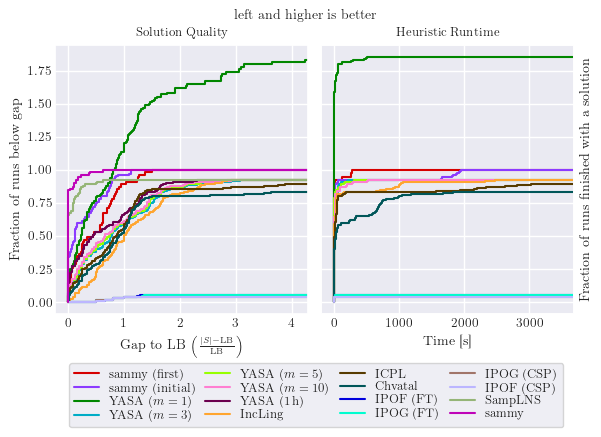

In [30]:
fig, (ax1, ax2) = plt.subplots(figsize=(6.7, 3.5), nrows=1, ncols=2,
                               sharey=True)
fig.suptitle('left and higher is better', fontsize=10)
plt.subplots_adjust(wspace=0.05, hspace=None)
sns.lineplot(data=solution_quality_performance_plot_data_df,
             x='relative_gap', y='frac_solved', hue='Algorithm',
             palette=palette, hue_order=extended_plot_order_noc, ax=ax1)
sns.lineplot(data=heuristic_fraction_solved_after_time_df, x='time', y='frac_solved',
             hue='Heuristic', palette=palette, 
             hue_order=extended_plot_order_noc, 
             ax=ax2, legend=None)
ax1.set_xlabel(r"Gap to LB {\small $\left(\frac{|S| - \operatorname{LB}}{\operatorname{LB}}\right)$}")
ax1.set_ylabel(r"Fraction of runs below gap")
ax1.legend().set_title("")
ax1.tick_params(axis='x', pad=-3)
ax1.tick_params(axis='y', pad=-3)
ax1.set_title("Solution Quality", fontsize=9)
ax1.set_xlim(ax1.get_xlim()[0], 4.3)
ax3 = ax2.twinx()
ax3.set_yticks([])
ax3.set_ylim(*ax2.get_ylim())
ax3.set_ylabel("Fraction of runs finished with a solution")
ax3.yaxis.set_label_position("right")
ax2.tick_params(axis='x', pad=-3)
ax2.set_xlabel('Time [s]')
ax2.set_title('Heuristic Runtime', fontsize=9)
ax2.set_xlim(ax2.get_xlim()[0], 3700)
for ytickline in ax2.get_yticklines():
    ytickline.set_visible(False)
sns.move_legend(ax1, "center", ncol=4, bbox_to_anchor=(1.03, -0.3),
                labelspacing=0.1, columnspacing=0.8, fontsize=9)
plt.savefig('solution_quality_and_heuristic_runtime.pdf',
            bbox_inches='tight')

# Summary table

In [31]:
instance_summary = []
for instance, instance_data in sammy_data.items():
    num_features = instance_data['simplification_variables_before']
    num_concrete = instance_data['simplification_concrete_before']
    num_clauses = instance_data['simplification_clauses_before']
    unsimplified_num_interactions = nosimp_data[instance]['feature_count_nonreduced']
    simplified_and_reduced_interactions = np.median(sammy_data[instance]['interactions_reduceds'])
    sammy_lb_min = instance_data['min_lb']
    sammy_lb_max = instance_data['max_lb']
    sammy_lb_med = instance_data['med_lb']
    sammy_ub_min = instance_data['min_ub']
    sammy_ub_max = instance_data['max_ub']
    sammy_ub_med = instance_data['med_ub']
    sammy_time_min = instance_data['min_solve_time']
    sammy_time_max = instance_data['max_solve_time']
    sammy_time_med = instance_data['med_solve_time']
    sammy_max_mes = instance_data['max_best_mes_size']
    sammy_max_mes_is_opt = (sammy_max_mes == sammy_ub_min) or any(instance_data['lb_optimalities'])
    row = {
        'instance': instance,
        'num_features': num_features,
        'num_concrete': num_concrete,
        'num_clauses': num_clauses,
        'unsimplified_num_interactions': unsimplified_num_interactions,
        'simplified_and_reduced_interactions': simplified_and_reduced_interactions,
        'percentage_remaining_interactions': 100.0 * (simplified_and_reduced_interactions / unsimplified_num_interactions),
        'sammy_lb_min': sammy_lb_min,
        'sammy_lb_max': sammy_lb_max,
        'sammy_lb_med': sammy_lb_med,
        'sammy_ub_min': sammy_ub_min,
        'sammy_ub_max': sammy_ub_max,
        'sammy_ub_med': sammy_ub_med,
        'sammy_time_min': sammy_time_min,
        'sammy_time_max': sammy_time_max,
        'sammy_time_med': sammy_time_med,
        'sammy_max_mes': sammy_max_mes,
        'sammy_max_mes_is_opt': sammy_max_mes_is_opt,
        'sammy_gap_percentage': 100.0 * ((sammy_ub_med - sammy_lb_med) / sammy_lb_med),
        'samplns_lb_min': None,
        'samplns_lb_max': None,
        'samplns_lb_med': None,
        'samplns_ub_min': None,
        'samplns_ub_max': None,
        'samplns_ub_med': None,
        'samplns_time_min': None,
        'samplns_time_max': None,
        'samplns_time_med': None,
        'samplns_gap_percentage': None,
    }
    if instance in samplns_data:
        samplns_lbs = samplns_data[instance]['lower_bounds']
        samplns_ubs = samplns_data[instance]['upper_bounds']
        row['samplns_lb_min'] = min(samplns_lbs)
        row['samplns_lb_max'] = max(samplns_lbs)
        row['samplns_lb_med'] = np.median(samplns_lbs)
        row['samplns_ub_min'] = min(samplns_ubs)
        row['samplns_ub_max'] = max(samplns_ubs)
        row['samplns_ub_med'] = np.median(samplns_ubs)
        row['samplns_time_min'] = min(samplns_data[instance]['solve_times'])
        row['samplns_time_max'] = max(samplns_data[instance]['solve_times'])
        row['samplns_time_med'] = np.median(samplns_data[instance]['solve_times'])
        row['samplns_gap_percentage'] = 100.0 * ((row['samplns_ub_med'] - row['samplns_lb_med']) / row['samplns_lb_med'])
    instance_summary.append(row)
instance_summary_df = pd.DataFrame(instance_summary)

In [32]:
def print_table(instance_summary_df, output):
    def p(s, **kw):
        print(s, file=output, **kw)

    def plim(s, limit=15):
        if len(s) > limit + 2:
            print(s[:limit] + r'\ldots', file=output, end='')
        else:
            print(s, file=output, end='')

    def pw(s, **kw):
        print(s, file=output, end='', **kw)

    def print_num(num, bold):
        if num == round(num):
            num = int(num)
        text = f'\\num[text-series-to-math=true]{{{num}}}'
        if bold is not None:
            if num == bold:
                text = r'\textbf{' + text + '}'
        print(text, file=output, end='')

    def print_triplet(minval, medval, maxval, bold=None):
        if minval == medval and medval == maxval:
            print_num(minval, bold)
        else:
            print_num(minval, bold)
            pw(r', ')
            print_num(medval, bold)
            pw(r', ')
            print_num(maxval, bold)
    
    p(r'''
\begin{table*}
\sisetup{
exponent-mode = fixed,
fixed-exponent = 0,
}
\centering
\begin{tiny}
% instance | features | concrete | clauses | interactions | interactions (red) |  sammy LB (min/med/max) | sammy UB (min/med/max)
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrr}
Instance & $|\mathcal{F}|$ & $|\mathcal{C}|$ & Clauses & $|\mathcal{I}|$  & LB        & UB    & LB      & UB       & Time  & Time\\
         &                 &                 &         & (frac.\ rem.)    & sammy     & sammy & SampLNS & SampLNS  & sammy & SampLNS\\
\hline
    ''')
    for row in instance_summary_df.sort_values('unsimplified_num_interactions').itertuples():
        plim(row.instance.replace('_', r'\_'))
        pw(' & ')
        pw(r'\num[text-series-to-math=true]{' + str(row.num_features) + '} & ')
        pw(r'\num[text-series-to-math=true]{' + str(row.num_concrete) + '} & ')
        pw(r'\num[text-series-to-math=true]{' + str(row.num_clauses) + '} & ')
        pw(r'\num[text-series-to-math=true]{' + str(row.unsimplified_num_interactions) + '} ')
        pw(r'(\num[text-series-to-math=true]{' + "%.2f" % (0.01 * row.percentage_remaining_interactions) + r'}) & ')
        print_triplet(row.sammy_lb_min, row.sammy_lb_med, row.sammy_lb_max,
                      bold=row.sammy_ub_min)
        pw(' & ')
        print_triplet(row.sammy_ub_min, row.sammy_ub_med, row.sammy_ub_max, 
                      bold=row.sammy_lb_max)
        pw(' & ')
        if row.samplns_lb_min and np.isfinite(row.samplns_lb_min):
            print_triplet(row.samplns_lb_min, row.samplns_lb_med, row.samplns_lb_max,
                          bold=row.sammy_ub_min)
            pw(' & ')
            print_triplet(row.samplns_ub_min, row.samplns_ub_med, row.samplns_ub_max,
                          bold=row.sammy_lb_max)
        else:
            pw(r'--- & ---')
        pw(' & ')
        pw("%.1f" % row.sammy_time_med)
        pw(' & ')
        if row.samplns_lb_min and np.isfinite(row.samplns_lb_min):
            pw("%.1f" % row.samplns_time_med)
        else:
            pw(r'---')
        p(r'\\')
    p(r'''\hline\ \\
\end{tabular}}
\end{tiny}
\caption{Table of the instances of the benchmark set and the outcomes of sammy and SampLNS.
Bold numbers indicate optimal solutions.
The bound columns give minimum, median and maximum values achieved by the \num{5} repeat runs we performed per instance and algorithm, unless all three numbers are the same.
The runtime shown is the median runtime across repeat runs.
For sammy, we ran the initial heuristic for a minimum of \qty{5}{s}, therefore the runtime, even for very small instances,
is never below \qty{5}{s} since the initial lower bound was never sufficient to prove optimality.}
\label{tab:instance_summary}
\end{table*}
      ''')

In [33]:
#with open('foo/test.tex', 'w') as f:
#    f.write(r'\documentclass{article}\usepackage{siunitx}\usepackage{graphicx}\begin{document}')
#    print_table(instance_summary_df, f)
#    f.write(r'\end{document}\n')

In [34]:
with open('benchmark_instance_table.tex', 'w') as f:
    print_table(instance_summary_df, f)

In [35]:
better_lbs = 0
best_samplns_better_than_worst_sammy = 0
for row in instance_summary_df.itertuples():
    if not row.samplns_lb_min or not np.isfinite(row.samplns_lb_min):
        better_lbs += 1
        continue
    if row.samplns_lb_max > row.sammy_lb_max:
        raise RuntimeError("Warning: SampLNS found better LB than sammy for instance " + str(row.instance))
    if row.samplns_lb_max < row.sammy_lb_max:
        better_lbs += 1
    if row.samplns_lb_max > row.sammy_lb_min:
        best_samplns_better_than_worst_sammy += 1

In [36]:
better_lbs, best_samplns_better_than_worst_sammy

(21, 0)

# Instances with optimal MES that is not tight

In [37]:
for instance, instance_data in sammy_data.items():
    if instance_data['max_lb'] != instance_data['min_ub']:
        # we don't know the exact solution value
        continue
    if instance_data['max_best_mes_size'] == instance_data['min_ub']:
        # tight lower bound by MES
        continue
    if any(instance_data["mes_optimalities"]):
        print(f"Instance {instance} - MESs: {instance_data["best_mes_sizes"]}"
              f" - MES optimalities {instance_data["mes_optimalities"]} - "
              f"LB {instance_data['max_lb']} - UB {instance_data['min_ub']}")
    

Instance FameDB - MESs: [6, 6, 6, 6, 6] - MES optimalities [True, True, True, True, True] - LB 8 - UB 8
Instance aaed2000 - MESs: [51, 51, 51, 51, 51] - MES optimalities [True, True, True, True, True] - LB 52 - UB 52
Instance XSEngine - MESs: [33, 33, 33, 33, 33] - MES optimalities [True, True, True, True, True] - LB 34 - UB 34
Instance ChatClient - MESs: [5, 5, 5, 5, 5] - MES optimalities [True, True, True, True, True] - LB 7 - UB 7
Instance ea2468 - MESs: [33, 33, 33, 33, 33] - MES optimalities [True, True, True, True, True] - LB 34 - UB 34
Instance FeatureIDE - MESs: [5, 5, 5, 5, 5] - MES optimalities [True, True, True, True, True] - LB 8 - UB 8
Instance dell - MESs: [30, 30, 30, 29, 30] - MES optimalities [False, False, True, False, False] - LB 31 - UB 31
Instance berkeleyDB2 - MESs: [11, 11, 11, 11, 11] - MES optimalities [False, False, True, True, True] - LB 12 - UB 12
Instance busybox-1_29_2 - MESs: [21, 21, 21, 21, 21] - MES optimalities [True, True, True, True, True] - LB 22 -